In [1]:
import numpy as np
import matplotlib.pyplot as plt
import confining_potential as con
import parameters as para
import postprocessing as post





In [4]:
data = post.get_pot_landscape(para.fields[116])

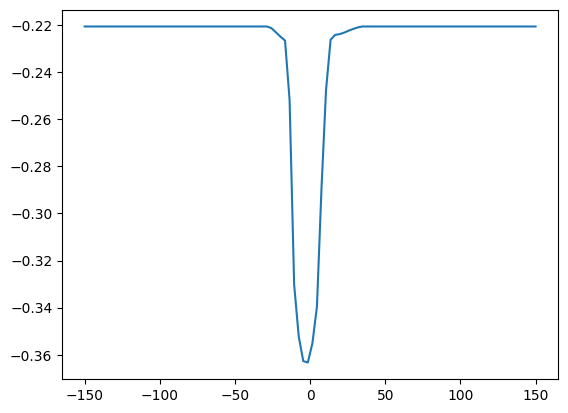

In [7]:
plt.plot(np.linspace(-para.com_width , para.com_width , para.o, endpoint=True)*1e9, data)
plt.show()

In [ ]:
h = post.h_bar_omega()
energy, state = load_data(para.path_1D)

In [8]:

import os 

fields = para.fields
pot = []
f_name = []


for field in fields:

    if 'Unnamed' not in field:
        f_name.append(field)
        pot.append(eval(field))

pot = sorted(pot)


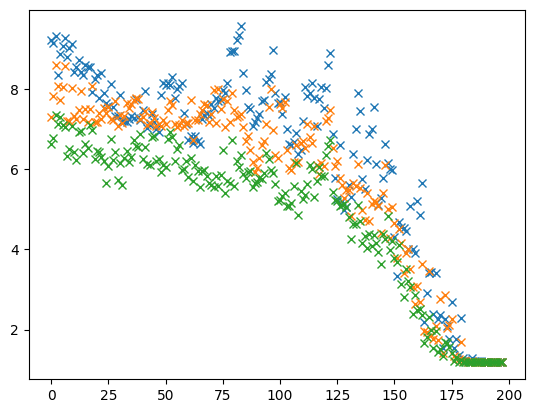

In [6]:
box_array =  np.linspace(-para.x_width, para.x_width, para.m ,endpoint=True)
BO_array = np.linspace(-para.com_width , para.com_width , para.o , endpoint =True)
r_square = np.zeros( [150,150, 15])
for i in range(150):
    for j in range(150):
        r_square[i,j, :] = box_array[i]**2 + box_array[j]**2

x_eh = np.zeros([len(pot), 15])

index = 0
for file in pot:
    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(file))
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(file))
    integral = np.trapz(states**2 , BO_array, axis=2)
    integral = integral * r_square
    integral = np.trapz(integral , box_array, axis=0)
    integral = np.trapz(integral , box_array, axis=0)

    x_eh[index , :] = np.sqrt(integral) *1e9
    index+=1


for i in [0,2 ,4]:

    plt.plot(range(len(pot)), x_eh[:, i] , 'x')

plt.show()


In [11]:
e_n = np.zeros([len(pot) , 15])
x = np.zeros((len(pot),15))
var_x = np.zeros((len(pot),15))
osc = np.zeros((len(pot),15))
index = 0
for file in pot:
    energy = np.load('/work/kk472919/hamiltonian1D_2/energiesData/pot{}.npy'.format(file))
    states = np.load('/work/kk472919/hamiltonian1D_2/statesData/pot{}.npy'.format(file))

    e_n[index , :] = energy
    x[index , : ] = post.COM_pos(states, X = np.linspace(-150e-9 , 150e-9 , 200), x= np.linspace(-20e-9 , 20e-9 , 150))
    osc[index , :] = post.osci_strength(states, energy)
    var_x[index,:] = post.COM_pos_square(states, X = np.linspace(-150e-9 , 150e-9 , 200), x= np.linspace(-20e-9 , 20e-9 , 150))

    index+=ß

FileNotFoundError: [Errno 2] No such file or directory: '/work/kk472919/hamiltonian1D_2/energiesData/pot-32.0.npy'

In [4]:
var = var_x - x**2

In [4]:
pot


[-32.0,
 -31.8,
 -31.6,
 -31.400000000000002,
 -31.200000000000003,
 -31.0,
 -30.8,
 -30.6,
 -30.400000000000002,
 -30.2,
 -30.0,
 -29.8,
 -29.6,
 -29.400000000000002,
 -29.2,
 -29.0,
 -28.8,
 -28.6,
 -28.400000000000002,
 -28.2,
 -28.0,
 -27.8,
 -27.6,
 -27.4,
 -27.200000000000003,
 -27.0,
 -26.8,
 -26.6,
 -26.4,
 -26.200000000000003,
 -26.0,
 -25.8,
 -25.6,
 -25.4,
 -25.200000000000003,
 -25.0,
 -24.8,
 -24.6,
 -24.4,
 -24.200000000000003,
 -24.0,
 -23.8,
 -23.6,
 -23.4,
 -23.200000000000003,
 -23.0,
 -22.8,
 -22.6,
 -22.4,
 -22.200000000000003,
 -22.0,
 -21.8,
 -21.6,
 -21.4,
 -21.200000000000003,
 -21.0,
 -20.8,
 -20.6,
 -20.4,
 -20.200000000000003,
 -20.0,
 -19.8,
 -19.6,
 -19.4,
 -19.2,
 -19.0,
 -18.8,
 -18.6,
 -18.4,
 -18.2,
 -18.0,
 -17.8,
 -17.6,
 -17.4,
 -17.2,
 -17.0,
 -16.8,
 -16.6,
 -16.4,
 -16.2,
 -16.0,
 -15.8,
 -15.6,
 -15.4,
 -15.2,
 -15.0,
 -14.8,
 -14.6,
 -14.4,
 -14.2,
 -14.0,
 -13.8,
 -13.6,
 -13.4,
 -13.2,
 -13.0,
 -12.8,
 -12.6,
 -12.4,
 -12.2,
 -12.0,
 -12,
 -11

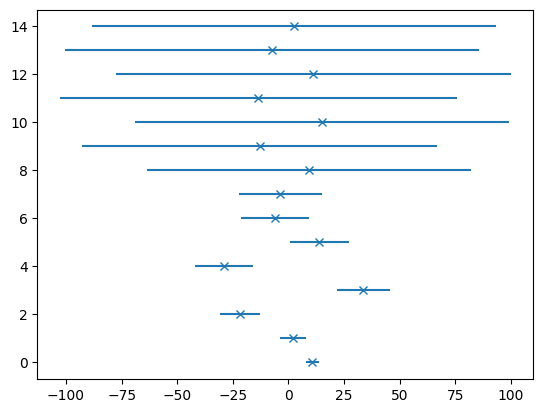

In [16]:
plt.errorbar(x[190 , :]*1e9 , range(15) , xerr= np.sqrt(var[10,:])*1e9 , fmt = 'x')
plt.show()

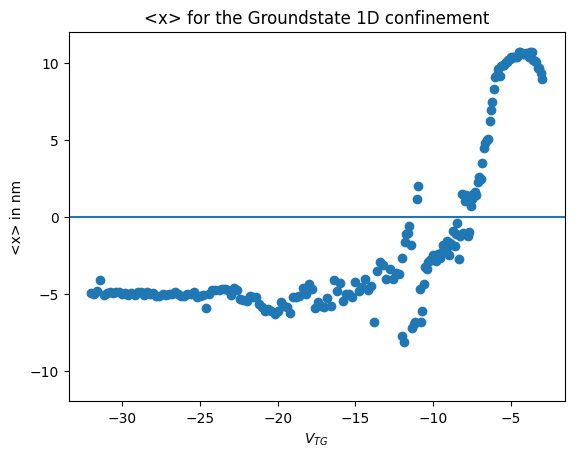

In [31]:
plt.plot(pot , x[: ,0 ]*1e9 , 'o')
#plt.plot(pot , x[: ,5 ]*1e9 , 'o')
plt.ylim([-12,12])
plt.axhline()
plt.xlabel('$V_{TG}$' )
plt.ylabel('<x> in nm')
plt.title('<x> for the Groundstate 1D confinement')
plt.show()

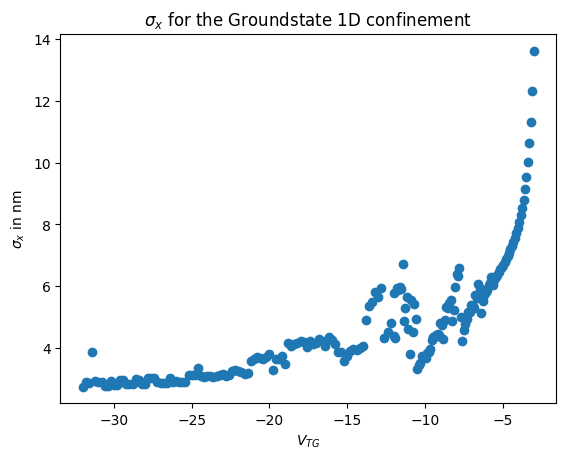

In [37]:
plt.plot(pot , np.sqrt(var[: ,0 ])*1e9 , 'o')
plt.xlabel('$V_{TG}$' )
plt.ylabel('$\sigma_x$ in nm')
plt.title('$\sigma_x$ for the Groundstate 1D confinement')
plt.show()

In [13]:
np.sqrt(var)

array([[2.75703588e-09, 5.71826239e-09, 8.61615200e-09, ...,
        9.01009246e-08, 9.35291045e-08, 9.10720270e-08],
       [2.89755054e-09, 6.33479859e-09, 9.01491992e-09, ...,
        7.83434307e-08, 7.63581294e-08, 7.68393365e-08],
       [2.87954350e-09, 6.33726816e-09, 9.23175486e-09, ...,
        8.40275781e-08, 8.32370317e-08, 8.21044958e-08],
       ...,
       [1.13263927e-08, 3.22158639e-08, 8.36278385e-08, ...,
        8.88116585e-08, 8.79391460e-08, 8.86832420e-08],
       [1.23195316e-08, 4.10688253e-08, 8.32982234e-08, ...,
        8.83949566e-08, 8.79755453e-08, 8.84584873e-08],
       [1.36277599e-08, 5.08860981e-08, 8.10572277e-08, ...,
        8.80237229e-08, 8.79618856e-08, 8.82140245e-08]])

In [5]:
print(x)
print(var_x)

[[-4.96564965e-09 -2.63984405e-09  3.43277754e-10 ... -4.51223303e-09
  -9.53233271e-10  7.50163622e-09]
 [-5.04340055e-09 -4.79664537e-09 -2.71901030e-09 ...  5.16729111e-08
  -5.40768108e-08  5.40536937e-08]
 [-4.86790798e-09 -3.79390758e-09 -2.59368413e-09 ...  3.73451748e-08
  -4.27104865e-08  4.35593234e-08]
 ...
 [ 9.63464987e-09 -9.17262994e-09  1.19950051e-09 ...  4.82604793e-10
  -3.35533707e-09  4.50124643e-09]
 [ 9.35017122e-09 -1.51104722e-08  2.07678917e-08 ... -1.49368722e-09
  -1.37089314e-09  2.82679644e-09]
 [ 8.93956046e-09 -2.24234457e-08  3.26339760e-08 ... -2.68358636e-09
   1.39917964e-10  1.41738146e-09]]
[[3.22589233e-17 3.96673014e-17 7.43559150e-17 ... 8.13853687e-15
  8.74860204e-15 8.35038864e-15]
 [3.38316882e-17 6.31374800e-17 8.86617982e-17 ... 8.80778287e-15
  8.75486539e-15 8.82608544e-15]
 [3.19882989e-17 5.45547025e-17 9.19524951e-17 ... 8.45529596e-15
  8.75258910e-15 8.63856288e-15]
 ...
 [2.21113649e-16 1.12199903e-15 6.99505417e-15 ... 7.88774359e

In [14]:
var

array([[7.60124682e-18, 3.26985248e-17, 7.42380754e-17, ...,
        8.11817662e-15, 8.74769339e-15, 8.29411410e-15],
       [8.39579913e-18, 4.01296732e-17, 8.12687812e-17, ...,
        6.13769313e-15, 5.83056392e-15, 5.90428363e-15],
       [8.29177078e-18, 4.01609677e-17, 8.52252977e-17, ...,
        7.06063388e-15, 6.92840344e-15, 6.74114823e-15],
       ...,
       [1.28287171e-16, 1.03786189e-15, 6.99361536e-15, ...,
        7.88751068e-15, 7.73329340e-15, 7.86471741e-15],
       [1.51770859e-16, 1.68664841e-15, 6.93859402e-15, ...,
        7.81366835e-15, 7.73969657e-15, 7.82490397e-15],
       [1.85715839e-16, 2.58939498e-15, 6.57027416e-15, ...,
        7.74817580e-15, 7.73729331e-15, 7.78171412e-15]])

In [ ]:
y = 

In [4]:
states.shape

(150, 150, 200, 15)

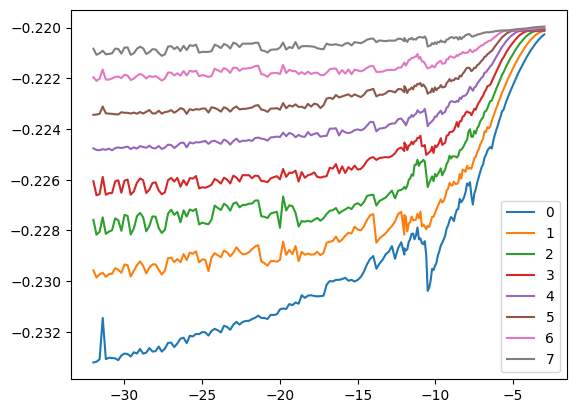

In [15]:
for i in range(8):

    plt.plot(pot, e_n[:, i]/para.joul_to_eV, label = i)


plt.legend()
plt.show()



In [17]:
para.fields.index('-10.5')

186

In [20]:
para.fields[187]

'-10.59375'

-32.0


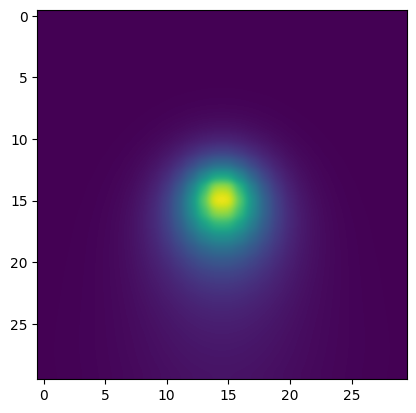

-10.6875


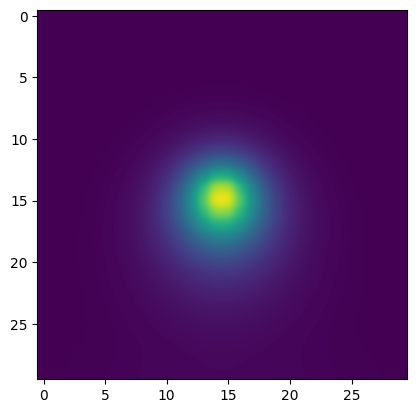

-10.59375


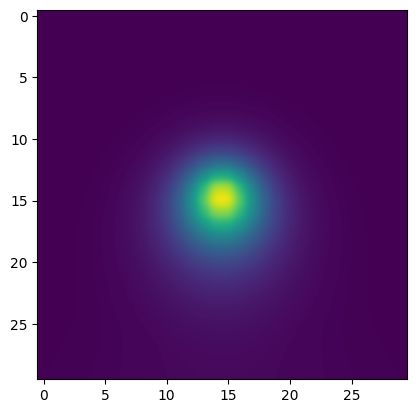

-10.5


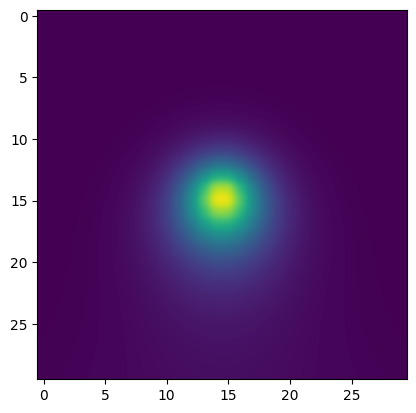

-10.40625


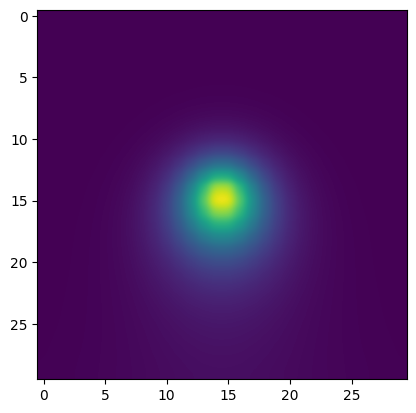

-10.3125


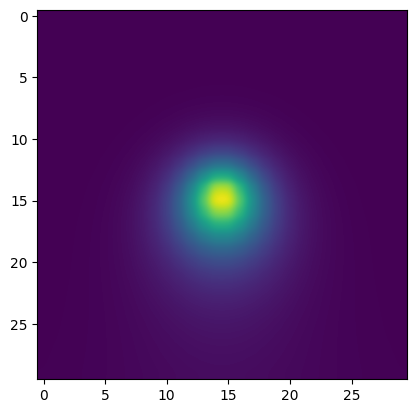

-3


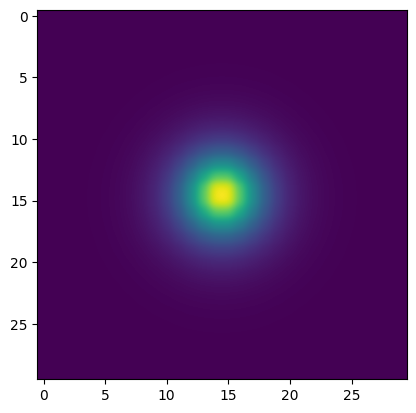

In [8]:
for i in [0,115, 116 , 117 , 118 , 119 , 197]:

    energy = np.load('/hpcwork/kk472919/ham1d_backup/energiesData/pot{}.npy'.format(pot[i]))
    states = np.load('/hpcwork/kk472919/ham1d_backup/statesData/pot{}.npy'.format(pot[i]))
    print(pot[i])
    integral = np.trapz(states, x = np.linspace(-para.com_width, para.com_width, 200, endpoint=True), axis=2 )**2
    plt.imshow(integral[60:90,60:90,0] , interpolation='gaussian')
    plt.show()

In [43]:
import pos_solver as pos
for i in [ 0 , 180 , 150 , 80 ]:
    BO_energy = np.zeros(200)
    BO_array = np.linspace(-150e-9, 150e-9, 200, endpoint=True)
    for j,x  in enumerate(BO_array):
        BO_energy[j] = np.load('/work/kk472919/hamiltonian1D/rel_data/energies/pot{}/com_x{}.npy'.format(pot[i] , x))/para.joul_to_eV
    plt.plot(np.linspace(-150, 150, 200, endpoint=True)[50:150], BO_energy[50:150] , label = pot[i])

plt.title('potential landscape COM equation')
plt.xlabel('X in nm')
plt.ylabel('')
plt.legend()
plt.show()



In [7]:
for i in [116,117,118]:
    print(np.load('/work/kk472919/hamiltonian1D_2/energiesData/pot{}.npy'.format(pot[i]))/para.joul_to_eV)
    


[-0.23143143 -0.2292365  -0.22799772 -0.22674692 -0.22557711 -0.2245072
 -0.22327155 -0.22252081 -0.22188055 -0.22160311 -0.22130114 -0.2207325
 -0.22029106 -0.21963579 -0.21901962]
[-0.23113134 -0.22904249 -0.22775073 -0.22638088 -0.22524039 -0.22426947
 -0.22319678 -0.22246265 -0.22180626 -0.22158694 -0.22121341 -0.22066955
 -0.22023998 -0.21952689 -0.21897246]
[-0.23091288 -0.228891   -0.22759706 -0.22629591 -0.22518888 -0.22420189
 -0.2231455  -0.22241485 -0.22179758 -0.22157274 -0.22119313 -0.22064828
 -0.22020864 -0.2195049  -0.21893887]


In [17]:
pot[95:120]

[-13.0,
 -12.8,
 -12.6,
 -12.4,
 -12.2,
 -12.0,
 -12,
 -11.90625,
 -11.8125,
 -11.71875,
 -11.625,
 -11.53125,
 -11.4375,
 -11.34375,
 -11.25,
 -11.15625,
 -11.0625,
 -10.96875,
 -10.875,
 -10.78125,
 -10.6875,
 -10.59375,
 -10.5,
 -10.40625,
 -10.3125]

In [6]:
states.shape

(150, 150, 200, 15)

In [19]:
len(states.shape)


4

In [18]:
plt.figure(figsize=(12,8), dpi=80)

<Figure size 960x640 with 0 Axes>

<Figure size 960x640 with 0 Axes>

In [19]:

for i in [115, 116 , 117 , 118 , 119]:

    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(pot[i]))
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(pot[i]))
    integral = np.trapz(states, x = np.linspace(-para.com_width, para.com_width, para.o) )**2
    for j in [1,3,5]:
        plt.plot(BO_array, states[int(para.m/2) , int(para.m/2) , : , j] , label = j)
    plt.legend()

    plt.show()

ValueError: operands could not be broadcast together with shapes (1,1,1,299) (150,150,200,14) 

In [14]:
pot[117]

-10.5

In [20]:
localisation = [0, 1, 2, 3]
box_array =  np.linspace(-para.x_width, para.x_width, para.m ,endpoint=True)
BO_array = np.linspace(-para.com_width , para.com_width , para.o , endpoint =True)
for i in [115, 116 , 117 , 118 , 119 ]:
    

    energy = np.load('/work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(pot[i]))/para.joul_to_eV
    states = np.load('/work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(pot[i]))
    k_l_square = np.trapz(states[int(para.m/2), int(para.n/2), :, :], BO_array, axis = 0)**2
    plt.plot( energy[:8] , k_l_square[:8] , 'x')

    plt.show()





ValueError: operands could not be broadcast together with shapes (299,1) (199,15) 

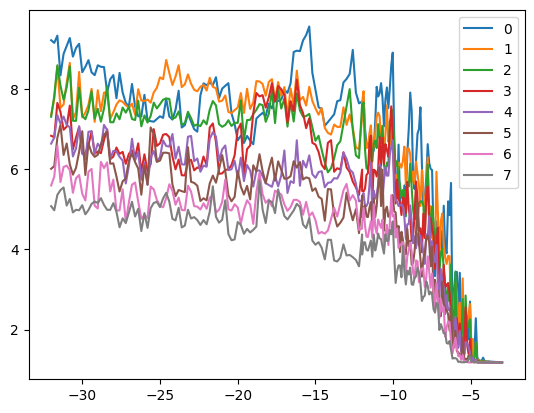

In [10]:
for i in range(8):

    plt.plot(pot, x_eh[:, i]  , label = i)

plt.legend()

plt.show()

In [22]:
len(f_name)

198

In [ ]:
for file in f_name:

    energy = np.load('work/kk472919/hamiltonian1D/energiesData/pot{}.npy'.format(file))
    states = np.load('work/kk472919/hamiltonian1D/statesData/pot{}.npy'.format(file))


In [4]:
import plot as p

In [5]:
h_bar = p.h_bar_omega()

In [18]:
print(para.fields)

['Unnamed: 0.4', 'Unnamed: 0', '-3', '-3.09375', '-3.1875', '-3.28125', '-3.375', '-3.46875', '-3.5625', '-3.65625', '-3.75', '-3.84375', '-3.9375', '-4.03125', '-4.125', '-4.21875', '-4.3125', '-4.40625', '-4.5', '-4.59375', '-4.6875', '-4.78125', '-4.875', '-4.96875', '-5.0625', '-5.15625', '-5.25', '-5.34375', '-5.4375', '-5.53125', '-5.625', '-5.71875', '-5.8125', '-5.90625', 'Unnamed: 0.1', '-12.0', '-12.2', '-12.4', '-12.6', '-12.8', '-13.0', '-13.2', '-13.4', '-13.6', '-13.8', '-14.0', '-14.2', '-14.4', '-14.6', '-14.8', '-15.0', '-15.2', '-15.4', '-15.6', '-15.8', '-16.0', '-16.2', '-16.4', '-16.6', '-16.8', '-17.0', '-17.2', '-17.4', '-17.6', '-17.8', '-18.0', '-18.2', '-18.4', '-18.6', '-18.8', '-19.0', '-19.2', '-19.4', '-19.6', '-19.8', '-20.0', '-20.200000000000003', '-20.4', '-20.6', '-20.8', '-21.0', '-21.200000000000003', '-21.4', '-21.6', '-21.8', '-22.0', '-22.200000000000003', '-22.4', '-22.6', '-22.8', '-23.0', '-23.200000000000003', '-23.4', '-23.6', '-23.8', '-24.